In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC 

In [2]:
!pip install geopandas pygeos rtree --quiet

In [3]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
df1=pd.read_csv("Fire_Dataset_2020.csv")
df2=pd.read_csv("Weather_dataset_2020.csv")
df3 = pd.read_csv("Fire_Dataset_2019.csv")
df4 = pd.read_csv("Weather_dataset_2019.csv")
df1 = pd.concat([df1,df3])
df2 = pd.concat([df2,df4])
df1.rename(columns = {'latitude_fire':'Latitude', 'longitude_fire':'Longitude'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
display(df1)

,Unnamed: 0,Latitude,Longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry,County
0,105,38.2006,-120.5829,303.2,1.0,1.0,2020-01-02,2106,Aqua,MODIS,55,6.03,283.7,6.8,D,0,POINT (-120.5829 38.2006),Calaveras
1,928,38.2313,-120.5941,304.3,1.2,1.1,2020-01-07,2124,Aqua,MODIS,59,6.03,273.2,11.1,D,0,POINT (-120.5941 38.2313),Calaveras
2,929,38.2297,-120.6077,307.9,1.2,1.1,2020-01-07,2124,Aqua,MODIS,66,6.03,274.7,13.9,D,0,POINT (-120.6077 38.2297),Calaveras
3,5718,38.2343,-120.5926,302.8,1.1,1.1,2020-02-12,2100,Aqua,MODIS,54,6.03,290.3,5.2,D,0,POINT (-120.5926 38.2343),Calaveras
4,5719,38.2321,-120.6052,307.9,1.1,1.1,2020-02-12,2100,Aqua,MODIS,66,6.03,291.0,9.1,D,0,POINT (-120.6052 38.2321),Calaveras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,102467,40.6505,-122.0503,353.5,2.9,1.6,2019-11-23,2156,Aqua,MODIS,97,6.03,295.0,321.0,D,0,POINT (-122.0503 40.6505),Shasta
953,102468,40.6358,-122.0492,320.1,2.9,1.6,2019-11-23,2156,Aqua,MODIS,80,6.03,291.9,74.7,D,0,POINT (-122.0492 40.6358),Shasta
954,102469,40.6523,-122.0167,316.1,2.9,1.6,2019-11-23,2156,Aqua,MODIS,76,6.03,291.9,58.4,D,0,POINT (-122.0167 40.6523),Shasta
955,103548,40.5858,-123.9560,311.7,1.8,1.3,2019-12-02,2150,Aqua,MODIS,50,6.03,285.8,28.6,D,0,POINT (-123.956 40.5858),Humboldt


In [5]:
display(df2)

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Dates,Time,Year,Month
0,104648,W-106016,Fog,Severe,2020-01-02 07:53:00,2020-01-02 10:07:00,0.00,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0,2020-01-02,07:53:00,2020,1
1,104649,W-106017,Fog,Severe,2020-01-02 11:21:00,2020-01-02 17:32:00,0.00,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0,2020-01-02,11:21:00,2020,1
2,104650,W-106018,Rain,Light,2020-01-09 12:53:00,2020-01-09 14:51:00,0.19,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0,2020-01-09,12:53:00,2020,1
3,104651,W-106019,Rain,Moderate,2020-01-09 14:51:00,2020-01-09 15:03:00,0.26,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0,2020-01-09,14:51:00,2020,1
4,104652,W-106020,Rain,Light,2020-01-09 15:03:00,2020-01-09 15:36:00,0.10,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0,2020-01-09,15:03:00,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60150,7461673,W-7559561,Cold,Severe,2019-11-28 04:35:00,2019-11-28 04:55:00,0.00,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0,2019-11-28,04:35:00,2019,11
60151,7461674,W-7559562,Precipitation,UNK,2019-12-07 00:55:00,2019-12-07 01:15:00,0.25,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0,2019-12-07,00:55:00,2019,12
60152,7461675,W-7559563,Precipitation,UNK,2019-12-07 01:55:00,2019-12-07 02:15:00,0.24,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0,2019-12-07,01:55:00,2019,12
60153,7461676,W-7559564,Precipitation,UNK,2019-12-07 10:55:00,2019-12-07 11:15:00,0.20,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0,2019-12-07,10:55:00,2019,12


In [6]:

df1['Dates'] = pd.to_datetime(df1['acq_date']).dt.date
df1['Time'] = pd.to_datetime(df1['acq_date']).dt.time
df1['Dates'] = pd.to_datetime(df1['Dates'])
df1['Year'] = df1['Dates'].dt.year
df1['Month'] = df1['Dates'].dt.month

In [7]:
display(df1)

,Unnamed: 0,Latitude,Longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,...,bright_t31,frp,daynight,type,geometry,County,Dates,Time,Year,Month
0,105,38.2006,-120.5829,303.2,1.0,1.0,2020-01-02,2106,Aqua,MODIS,...,283.7,6.8,D,0,POINT (-120.5829 38.2006),Calaveras,2020-01-02,00:00:00,2020,1
1,928,38.2313,-120.5941,304.3,1.2,1.1,2020-01-07,2124,Aqua,MODIS,...,273.2,11.1,D,0,POINT (-120.5941 38.2313),Calaveras,2020-01-07,00:00:00,2020,1
2,929,38.2297,-120.6077,307.9,1.2,1.1,2020-01-07,2124,Aqua,MODIS,...,274.7,13.9,D,0,POINT (-120.6077 38.2297),Calaveras,2020-01-07,00:00:00,2020,1
3,5718,38.2343,-120.5926,302.8,1.1,1.1,2020-02-12,2100,Aqua,MODIS,...,290.3,5.2,D,0,POINT (-120.5926 38.2343),Calaveras,2020-02-12,00:00:00,2020,2
4,5719,38.2321,-120.6052,307.9,1.1,1.1,2020-02-12,2100,Aqua,MODIS,...,291.0,9.1,D,0,POINT (-120.6052 38.2321),Calaveras,2020-02-12,00:00:00,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,102467,40.6505,-122.0503,353.5,2.9,1.6,2019-11-23,2156,Aqua,MODIS,...,295.0,321.0,D,0,POINT (-122.0503 40.6505),Shasta,2019-11-23,00:00:00,2019,11
953,102468,40.6358,-122.0492,320.1,2.9,1.6,2019-11-23,2156,Aqua,MODIS,...,291.9,74.7,D,0,POINT (-122.0492 40.6358),Shasta,2019-11-23,00:00:00,2019,11
954,102469,40.6523,-122.0167,316.1,2.9,1.6,2019-11-23,2156,Aqua,MODIS,...,291.9,58.4,D,0,POINT (-122.0167 40.6523),Shasta,2019-11-23,00:00:00,2019,11
955,103548,40.5858,-123.9560,311.7,1.8,1.3,2019-12-02,2150,Aqua,MODIS,...,285.8,28.6,D,0,POINT (-123.956 40.5858),Humboldt,2019-12-02,00:00:00,2019,12


In [8]:
df1.loc[df1['type']==0,'Active']=True
df1.loc[df1['type']==1,'Active']= True
df1.loc[df1['type']==2,'Active']=False
df1.loc[df1['type']==3,'Active']= False

In [9]:
display(df1)

,Unnamed: 0,Latitude,Longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,...,frp,daynight,type,geometry,County,Dates,Time,Year,Month,Active
0,105,38.2006,-120.5829,303.2,1.0,1.0,2020-01-02,2106,Aqua,MODIS,...,6.8,D,0,POINT (-120.5829 38.2006),Calaveras,2020-01-02,00:00:00,2020,1,True
1,928,38.2313,-120.5941,304.3,1.2,1.1,2020-01-07,2124,Aqua,MODIS,...,11.1,D,0,POINT (-120.5941 38.2313),Calaveras,2020-01-07,00:00:00,2020,1,True
2,929,38.2297,-120.6077,307.9,1.2,1.1,2020-01-07,2124,Aqua,MODIS,...,13.9,D,0,POINT (-120.6077 38.2297),Calaveras,2020-01-07,00:00:00,2020,1,True
3,5718,38.2343,-120.5926,302.8,1.1,1.1,2020-02-12,2100,Aqua,MODIS,...,5.2,D,0,POINT (-120.5926 38.2343),Calaveras,2020-02-12,00:00:00,2020,2,True
4,5719,38.2321,-120.6052,307.9,1.1,1.1,2020-02-12,2100,Aqua,MODIS,...,9.1,D,0,POINT (-120.6052 38.2321),Calaveras,2020-02-12,00:00:00,2020,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,102467,40.6505,-122.0503,353.5,2.9,1.6,2019-11-23,2156,Aqua,MODIS,...,321.0,D,0,POINT (-122.0503 40.6505),Shasta,2019-11-23,00:00:00,2019,11,True
953,102468,40.6358,-122.0492,320.1,2.9,1.6,2019-11-23,2156,Aqua,MODIS,...,74.7,D,0,POINT (-122.0492 40.6358),Shasta,2019-11-23,00:00:00,2019,11,True
954,102469,40.6523,-122.0167,316.1,2.9,1.6,2019-11-23,2156,Aqua,MODIS,...,58.4,D,0,POINT (-122.0167 40.6523),Shasta,2019-11-23,00:00:00,2019,11,True
955,103548,40.5858,-123.9560,311.7,1.8,1.3,2019-12-02,2150,Aqua,MODIS,...,28.6,D,0,POINT (-123.956 40.5858),Humboldt,2019-12-02,00:00:00,2019,12,True


In [10]:
df2.Dates = df2.Dates.astype('datetime64[ns]')
start = pd.DatetimeIndex(df2['StartTime(UTC)'])
end = pd.DatetimeIndex(df2['EndTime(UTC)'])
df2['Mean_Duration'] = (end-start).total_seconds()
grouped = df2.groupby(by=['Year','Month','Type','Severity'] ,as_index=False).agg({'Mean_Duration': "mean", 'EventId': "count"})
grouped['Count'] = grouped.EventId
caGrouped = grouped[['Year','Month','Type','Severity','Count',"Mean_Duration"]]

In [11]:
caGrouped.head()

,Year,Month,Type,Severity,Count,Mean_Duration
0,2019,1,Cold,Severe,171,7221.052632
1,2019,1,Fog,Moderate,1220,7111.868852
2,2019,1,Fog,Severe,1252,5933.674121
3,2019,1,Precipitation,UNK,82,1701.951220
4,2019,1,Rain,Heavy,123,2033.658537


In [12]:
groupedFire = df1.groupby(by=['Year','Month'] ,as_index=False).agg({'confidence': "sum",'Active':'count'})
groupedFire['Count'] = groupedFire.Active
caGroupedFire = groupedFire[['Year','Month','confidence','Count']]
caGroupedFire.head()

,Year,Month,confidence,Count
0,2019,1,2621,38
1,2019,2,1201,20
2,2019,3,1272,23
3,2019,4,2902,48
4,2019,5,2800,46


In [13]:
display(df1)

,Unnamed: 0,Latitude,Longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,...,frp,daynight,type,geometry,County,Dates,Time,Year,Month,Active
0,105,38.2006,-120.5829,303.2,1.0,1.0,2020-01-02,2106,Aqua,MODIS,...,6.8,D,0,POINT (-120.5829 38.2006),Calaveras,2020-01-02,00:00:00,2020,1,True
1,928,38.2313,-120.5941,304.3,1.2,1.1,2020-01-07,2124,Aqua,MODIS,...,11.1,D,0,POINT (-120.5941 38.2313),Calaveras,2020-01-07,00:00:00,2020,1,True
2,929,38.2297,-120.6077,307.9,1.2,1.1,2020-01-07,2124,Aqua,MODIS,...,13.9,D,0,POINT (-120.6077 38.2297),Calaveras,2020-01-07,00:00:00,2020,1,True
3,5718,38.2343,-120.5926,302.8,1.1,1.1,2020-02-12,2100,Aqua,MODIS,...,5.2,D,0,POINT (-120.5926 38.2343),Calaveras,2020-02-12,00:00:00,2020,2,True
4,5719,38.2321,-120.6052,307.9,1.1,1.1,2020-02-12,2100,Aqua,MODIS,...,9.1,D,0,POINT (-120.6052 38.2321),Calaveras,2020-02-12,00:00:00,2020,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,102467,40.6505,-122.0503,353.5,2.9,1.6,2019-11-23,2156,Aqua,MODIS,...,321.0,D,0,POINT (-122.0503 40.6505),Shasta,2019-11-23,00:00:00,2019,11,True
953,102468,40.6358,-122.0492,320.1,2.9,1.6,2019-11-23,2156,Aqua,MODIS,...,74.7,D,0,POINT (-122.0492 40.6358),Shasta,2019-11-23,00:00:00,2019,11,True
954,102469,40.6523,-122.0167,316.1,2.9,1.6,2019-11-23,2156,Aqua,MODIS,...,58.4,D,0,POINT (-122.0167 40.6523),Shasta,2019-11-23,00:00:00,2019,11,True
955,103548,40.5858,-123.9560,311.7,1.8,1.3,2019-12-02,2150,Aqua,MODIS,...,28.6,D,0,POINT (-123.956 40.5858),Humboldt,2019-12-02,00:00:00,2019,12,True


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3330 entries, 0 to 956
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3330 non-null   int64         
 1   Latitude    3330 non-null   float64       
 2   Longitude   3330 non-null   float64       
 3   brightness  3330 non-null   float64       
 4   scan        3330 non-null   float64       
 5   track       3330 non-null   float64       
 6   acq_date    3330 non-null   object        
 7   acq_time    3330 non-null   int64         
 8   satellite   3330 non-null   object        
 9   instrument  3330 non-null   object        
 10  confidence  3330 non-null   int64         
 11  version     3330 non-null   float64       
 12  bright_t31  3330 non-null   float64       
 13  frp         3330 non-null   float64       
 14  daynight    3330 non-null   object        
 15  type        3330 non-null   int64         
 16  geometry    3330 non-null

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111893 entries, 0 to 60154
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         111893 non-null  int64         
 1   EventId            111893 non-null  object        
 2   Type               111893 non-null  object        
 3   Severity           111893 non-null  object        
 4   StartTime(UTC)     111893 non-null  object        
 5   EndTime(UTC)       111893 non-null  object        
 6   Precipitation(in)  111893 non-null  float64       
 7   TimeZone           111893 non-null  object        
 8   AirportCode        111893 non-null  object        
 9   LocationLat        111893 non-null  float64       
 10  LocationLng        111893 non-null  float64       
 11  City               110744 non-null  object        
 12  County             111893 non-null  object        
 13  State              111893 non-null  object   

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3330 entries, 0 to 956
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3330 non-null   int64         
 1   Latitude    3330 non-null   float64       
 2   Longitude   3330 non-null   float64       
 3   brightness  3330 non-null   float64       
 4   scan        3330 non-null   float64       
 5   track       3330 non-null   float64       
 6   acq_date    3330 non-null   object        
 7   acq_time    3330 non-null   int64         
 8   satellite   3330 non-null   object        
 9   instrument  3330 non-null   object        
 10  confidence  3330 non-null   int64         
 11  version     3330 non-null   float64       
 12  bright_t31  3330 non-null   float64       
 13  frp         3330 non-null   float64       
 14  daynight    3330 non-null   object        
 15  type        3330 non-null   int64         
 16  geometry    3330 non-null

In [17]:
df1=df1.drop(['Unnamed: 0','acq_time','acq_date', 'version','instrument'], axis=1)
df2=df2.drop(['StartTime(UTC)','EndTime(UTC)','City'],axis=1)

In [18]:
x =pd.merge(df1, df2, on=['County', 'Dates'], how="inner")

In [19]:
x = x.drop(['LocationLat','LocationLng'], axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


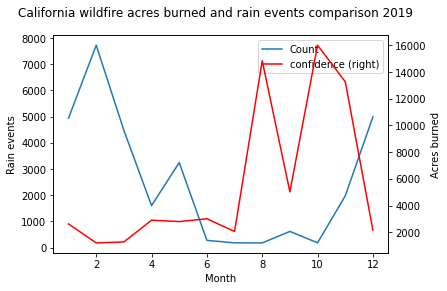

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


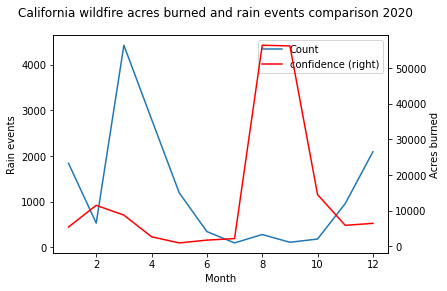

In [20]:
import scipy.stats as stats
import matplotlib.pyplot as plt

#Visualize rain and acres burned each year.
for year in [2019, 2020]:
    # Prepare grouping for each year, rain vs fire events graph
    caGroupedType = caGrouped.groupby(by=['Type','Month','Year'] ,as_index=False).agg({'Mean_Duration': "mean", 'Count': "sum"})
    isRain= caGroupedType["Type"] =="Rain"
    isYear= caGroupedType["Year"] ==year
    rain = caGroupedType[isRain][isYear]

    # Rename columns to join and prevent overlap
    renameFire = caGroupedFire.rename(columns={'ArchiveYear': 'Year','Count' :'FireEventCount'})
    isFireYear= renameFire["Year"] == year
    renameFire = renameFire[isFireYear]
    concatFireRain = pd.merge(rain, renameFire,  how='left', left_on=['Month','Year'], right_on = ['Month','Year'])
    # Create plot "California Wildfire and Rain comparison"
    ax = plt.gca()
    concatFireRain.plot(kind='line',x='Month',y='Count',ax=ax)
    plt.ylabel("Rain events")
    concatFireRain.plot(secondary_y=True,kind='line',x='Month',y='confidence',color='red', ax=ax)
    plt.ylabel("Acres burned")
    plt.suptitle("California wildfire acres burned and rain events comparison " + str(year))
    plt.show()

In [21]:
display(x)

,Latitude,Longitude,brightness,scan,track,satellite,confidence,bright_t31,frp,daynight,...,Severity,Precipitation(in),TimeZone,AirportCode,State,ZipCode,Time_y,Year_y,Month_y,Mean_Duration
0,37.9053,-120.0370,334.3,1.0,1.0,Aqua,0,276.2,35.7,D,...,Severe,0.0,US/Pacific,KO22,CA,95310.0,10:55:00,2020,1,4800.0
1,37.9053,-120.0370,334.3,1.0,1.0,Aqua,0,276.2,35.7,D,...,Severe,0.0,US/Pacific,KO22,CA,95310.0,12:35:00,2020,1,2400.0
2,37.9053,-120.0370,334.3,1.0,1.0,Aqua,0,276.2,35.7,D,...,Severe,0.0,US/Pacific,KO22,CA,95310.0,14:35:00,2020,1,1200.0
3,37.9053,-120.0370,334.3,1.0,1.0,Aqua,0,276.2,35.7,D,...,Severe,0.0,US/Pacific,KO22,CA,95310.0,16:55:00,2020,1,1200.0
4,37.9142,-120.0390,383.3,1.0,1.0,Aqua,87,283.5,167.6,D,...,Severe,0.0,US/Pacific,KO22,CA,95310.0,10:55:00,2020,1,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8001,38.6099,-122.8267,300.9,1.0,1.0,Aqua,34,281.5,7.9,N,...,Light,0.0,US/Pacific,KSTS,CA,95492.0,02:34:00,2019,10,1140.0
8002,38.6099,-122.8267,300.9,1.0,1.0,Aqua,34,281.5,7.9,N,...,Light,0.0,US/Pacific,KSTS,CA,95492.0,03:53:00,2019,10,3060.0
8003,38.6099,-122.8267,300.9,1.0,1.0,Aqua,34,281.5,7.9,N,...,Light,0.0,US/Pacific,KSTS,CA,95492.0,04:53:00,2019,10,1380.0
8004,39.7382,-121.5499,305.2,1.2,1.1,Aqua,61,279.8,10.9,D,...,Moderate,0.0,US/Pacific,KOVE,CA,95965.0,08:53:00,2019,12,3600.0


## #3 - EXPLORE NULL VALUES

In [22]:
x.isnull().sum()

Latitude             0
Longitude            0
brightness           0
scan                 0
track                0
satellite            0
confidence           0
bright_t31           0
frp                  0
daynight             0
type                 0
geometry             0
County               0
Dates                0
Time_x               0
Year_x               0
Month_x              0
Active               0
Unnamed: 0           0
EventId              0
Type                 0
Severity             0
Precipitation(in)    0
TimeZone             0
AirportCode          0
State                0
ZipCode              0
Time_y               0
Year_y               0
Month_y              0
Mean_Duration        0
dtype: int64

In [23]:
x=x.dropna()

In [24]:
x.isnull().sum()

Latitude             0
Longitude            0
brightness           0
scan                 0
track                0
satellite            0
confidence           0
bright_t31           0
frp                  0
daynight             0
type                 0
geometry             0
County               0
Dates                0
Time_x               0
Year_x               0
Month_x              0
Active               0
Unnamed: 0           0
EventId              0
Type                 0
Severity             0
Precipitation(in)    0
TimeZone             0
AirportCode          0
State                0
ZipCode              0
Time_y               0
Year_y               0
Month_y              0
Mean_Duration        0
dtype: int64

In [25]:
display(x)

,Latitude,Longitude,brightness,scan,track,satellite,confidence,bright_t31,frp,daynight,...,Severity,Precipitation(in),TimeZone,AirportCode,State,ZipCode,Time_y,Year_y,Month_y,Mean_Duration
0,37.9053,-120.0370,334.3,1.0,1.0,Aqua,0,276.2,35.7,D,...,Severe,0.0,US/Pacific,KO22,CA,95310.0,10:55:00,2020,1,4800.0
1,37.9053,-120.0370,334.3,1.0,1.0,Aqua,0,276.2,35.7,D,...,Severe,0.0,US/Pacific,KO22,CA,95310.0,12:35:00,2020,1,2400.0
2,37.9053,-120.0370,334.3,1.0,1.0,Aqua,0,276.2,35.7,D,...,Severe,0.0,US/Pacific,KO22,CA,95310.0,14:35:00,2020,1,1200.0
3,37.9053,-120.0370,334.3,1.0,1.0,Aqua,0,276.2,35.7,D,...,Severe,0.0,US/Pacific,KO22,CA,95310.0,16:55:00,2020,1,1200.0
4,37.9142,-120.0390,383.3,1.0,1.0,Aqua,87,283.5,167.6,D,...,Severe,0.0,US/Pacific,KO22,CA,95310.0,10:55:00,2020,1,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8001,38.6099,-122.8267,300.9,1.0,1.0,Aqua,34,281.5,7.9,N,...,Light,0.0,US/Pacific,KSTS,CA,95492.0,02:34:00,2019,10,1140.0
8002,38.6099,-122.8267,300.9,1.0,1.0,Aqua,34,281.5,7.9,N,...,Light,0.0,US/Pacific,KSTS,CA,95492.0,03:53:00,2019,10,3060.0
8003,38.6099,-122.8267,300.9,1.0,1.0,Aqua,34,281.5,7.9,N,...,Light,0.0,US/Pacific,KSTS,CA,95492.0,04:53:00,2019,10,1380.0
8004,39.7382,-121.5499,305.2,1.2,1.1,Aqua,61,279.8,10.9,D,...,Moderate,0.0,US/Pacific,KOVE,CA,95965.0,08:53:00,2019,12,3600.0


In [26]:
x = x.drop(['track'], axis = 1)
x.drop(columns = [ 'TimeZone'], axis=1, inplace=True)

In [27]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

x['daynight'] = x['daynight'].map(daynight_map)
x['satellite'] = x['satellite'].map(satellite_map)

x.head()

,Latitude,Longitude,brightness,scan,satellite,confidence,bright_t31,frp,daynight,type,...,Type,Severity,Precipitation(in),AirportCode,State,ZipCode,Time_y,Year_y,Month_y,Mean_Duration
0,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,Fog,Severe,0.0,KO22,CA,95310.0,10:55:00,2020,1,4800.0
1,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,Fog,Severe,0.0,KO22,CA,95310.0,12:35:00,2020,1,2400.0
2,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,Fog,Severe,0.0,KO22,CA,95310.0,14:35:00,2020,1,1200.0
3,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,Fog,Severe,0.0,KO22,CA,95310.0,16:55:00,2020,1,1200.0
4,37.9142,-120.039,383.3,1.0,0,87,283.5,167.6,1,0,...,Fog,Severe,0.0,KO22,CA,95310.0,10:55:00,2020,1,4800.0


In [28]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
x['scan_binned'] = pd.cut(x['scan'], bins=bins, labels=labels)

x.head()

,Latitude,Longitude,brightness,scan,satellite,confidence,bright_t31,frp,daynight,type,...,Severity,Precipitation(in),AirportCode,State,ZipCode,Time_y,Year_y,Month_y,Mean_Duration,scan_binned
0,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,Severe,0.0,KO22,CA,95310.0,10:55:00,2020,1,4800.0,1
1,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,Severe,0.0,KO22,CA,95310.0,12:35:00,2020,1,2400.0,1
2,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,Severe,0.0,KO22,CA,95310.0,14:35:00,2020,1,1200.0,1
3,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,Severe,0.0,KO22,CA,95310.0,16:55:00,2020,1,1200.0,1
4,37.9142,-120.039,383.3,1.0,0,87,283.5,167.6,1,0,...,Severe,0.0,KO22,CA,95310.0,10:55:00,2020,1,4800.0,1


In [29]:
x['Fire'] = pd.cut(x['confidence'], bins=[-1,30, 60,100], labels= [0, 1, 2])

x.head()

,Latitude,Longitude,brightness,scan,satellite,confidence,bright_t31,frp,daynight,type,...,Precipitation(in),AirportCode,State,ZipCode,Time_y,Year_y,Month_y,Mean_Duration,scan_binned,Fire
0,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,0.0,KO22,CA,95310.0,10:55:00,2020,1,4800.0,1,0
1,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,0.0,KO22,CA,95310.0,12:35:00,2020,1,2400.0,1,0
2,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,0.0,KO22,CA,95310.0,14:35:00,2020,1,1200.0,1,0
3,37.9053,-120.037,334.3,1.0,0,0,276.2,35.7,1,0,...,0.0,KO22,CA,95310.0,16:55:00,2020,1,1200.0,1,0
4,37.9142,-120.039,383.3,1.0,0,87,283.5,167.6,1,0,...,0.0,KO22,CA,95310.0,10:55:00,2020,1,4800.0,1,2


In [30]:
x.sort_values(by='Year_y')

,Latitude,Longitude,brightness,scan,satellite,confidence,bright_t31,frp,daynight,type,...,Precipitation(in),AirportCode,State,ZipCode,Time_y,Year_y,Month_y,Mean_Duration,scan_binned,Fire
8005,39.7382,-121.5499,305.2,1.2,0,61,279.8,10.9,1,0,...,0.00,KOVE,CA,95965.0,17:53:00,2019,12,3600.0,2,2
7699,36.6701,-119.6370,325.9,1.1,0,84,285.8,27.0,1,0,...,0.08,KFAT,CA,93727.0,04:53:00,2019,2,7200.0,2,2
7700,36.6701,-119.6370,325.9,1.1,0,84,285.8,27.0,1,0,...,0.24,KFAT,CA,93727.0,06:53:00,2019,2,3600.0,2,2
7701,36.6701,-119.6370,325.9,1.1,0,84,285.8,27.0,1,0,...,0.02,KFAT,CA,93727.0,07:53:00,2019,2,3600.0,2,2
7702,36.6956,-119.6925,301.8,2.4,0,49,285.6,17.8,1,0,...,0.00,KFAT,CA,93727.0,08:43:00,2019,12,34500.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,36.2441,-118.7220,347.0,1.1,0,100,290.0,59.2,0,0,...,0.00,KPTV,CA,93257.0,16:37:00,2020,9,4740.0,2,2
2659,36.2441,-118.7220,347.0,1.1,0,100,290.0,59.2,0,0,...,0.00,KPTV,CA,93257.0,14:49:00,2020,9,6480.0,2,2
2658,36.2441,-118.7220,347.0,1.1,0,100,290.0,59.2,0,0,...,0.00,KPTV,CA,93257.0,08:56:00,2020,9,21180.0,2,2
2671,36.1987,-118.6642,349.9,1.1,0,100,294.9,70.9,0,0,...,0.00,KPTV,CA,93257.0,04:25:00,2020,9,900.0,2,2


In [31]:
x['Year_y'].value_counts()

2020    7558
2019     448
Name: Year_y, dtype: int64

In [32]:
y = x['Fire']
fin = x.drop(['confidence','Fire', 'bright_t31', 'State','EventId','AirportCode','ZipCode','Mean_Duration','geometry', 'Active','Year_y','Year_x','Month_x','Month_y','Unnamed: 0','Time_x','Time_y','Dates'], axis = 1)

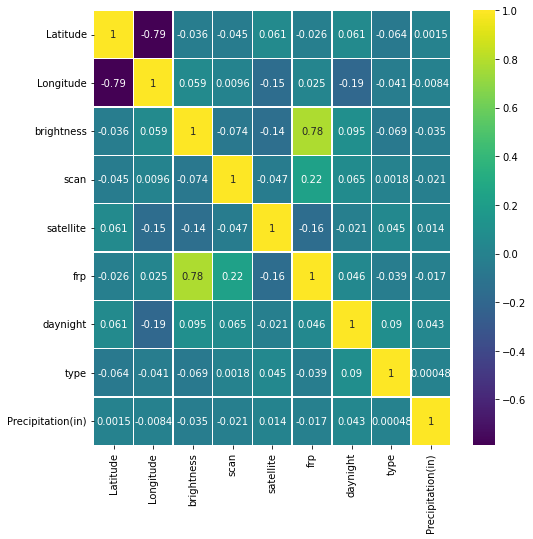

In [33]:
plt.figure(figsize=(8, 8)),
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [34]:
fin.head()

,Latitude,Longitude,brightness,scan,satellite,frp,daynight,type,County,Type,Severity,Precipitation(in),scan_binned
0,37.9053,-120.037,334.3,1.0,0,35.7,1,0,Tuolumne,Fog,Severe,0.0,1
1,37.9053,-120.037,334.3,1.0,0,35.7,1,0,Tuolumne,Fog,Severe,0.0,1
2,37.9053,-120.037,334.3,1.0,0,35.7,1,0,Tuolumne,Fog,Severe,0.0,1
3,37.9053,-120.037,334.3,1.0,0,35.7,1,0,Tuolumne,Fog,Severe,0.0,1
4,37.9142,-120.039,383.3,1.0,0,167.6,1,0,Tuolumne,Fog,Severe,0.0,1


In [35]:
fin = pd.get_dummies(fin)
display(fin)

,Latitude,Longitude,brightness,scan,satellite,frp,daynight,type,Precipitation(in),County_Alameda,...,Type_Storm,Severity_Heavy,Severity_Light,Severity_Moderate,Severity_Severe,scan_binned_1,scan_binned_2,scan_binned_3,scan_binned_4,scan_binned_5
0,37.9053,-120.0370,334.3,1.0,0,35.7,1,0,0.0,0,...,0,0,0,0,1,1,0,0,0,0
1,37.9053,-120.0370,334.3,1.0,0,35.7,1,0,0.0,0,...,0,0,0,0,1,1,0,0,0,0
2,37.9053,-120.0370,334.3,1.0,0,35.7,1,0,0.0,0,...,0,0,0,0,1,1,0,0,0,0
3,37.9053,-120.0370,334.3,1.0,0,35.7,1,0,0.0,0,...,0,0,0,0,1,1,0,0,0,0
4,37.9142,-120.0390,383.3,1.0,0,167.6,1,0,0.0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8001,38.6099,-122.8267,300.9,1.0,0,7.9,0,0,0.0,0,...,0,0,1,0,0,1,0,0,0,0
8002,38.6099,-122.8267,300.9,1.0,0,7.9,0,0,0.0,0,...,0,0,1,0,0,1,0,0,0,0
8003,38.6099,-122.8267,300.9,1.0,0,7.9,0,0,0.0,0,...,0,0,1,0,0,1,0,0,0,0
8004,39.7382,-121.5499,305.2,1.2,0,10.9,1,0,0.0,0,...,0,0,0,1,0,0,1,0,0,0


In [36]:
Xtrain = fin[:7558]
Xtest =fin[-448:]
ytrain =y[:7558]
ytest =y[-448:]

In [37]:
linear = LinearSVC(C =0.1, max_iter=100, random_state=0) # Call to LinearSVC()
linear.fit(Xtrain, ytrain) # Call to fit()
y_predS = linear.predict(Xtest) # Call to predict() for X_test
print("Predictions: ",y_predS)
y_pred_for_trainS = linear.predict(Xtrain) # Call to predict() for X_train
print("\n\nTRAINING set score: {:.2f}".format(linear.score(Xtrain, ytrain))) # Call to score() for training set
print("TEST set score: {:.2f}".format(linear.score(Xtest, ytest))) 
print("\n\nConfusion Matrix=",confusion_matrix(ytest, y_predS)) # Call to confusion matrix()
print("\n\nClassification Report=\n\n",classification_report(ytest, y_predS,zero_division=0))

Predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 0 0 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 2 2 0 0 2 2 1 1 1 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 2 0 0 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1]


TRAINING set score: 0.75
TEST set score: 0.65


Confusion Matrix= [[  0  1

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [38]:
gbc = GradientBoostingClassifier(warm_start=True, n_estimators=3, learning_rate=0.5,max_depth=1,random_state=50)
gbc.fit(Xtrain,ytrain) # INITIAL FIT
y_predg = gbc.predict(Xtest) 
print("Predictions: ",y_predg)
print("\n\nTraining Score: {:.2f}".format(gbc.score(Xtrain, ytrain)))
print("Testing Score: {:.2f}".format(gbc.score(Xtest, ytest)))
print("\n\nConfusion Matrix=",confusion_matrix(ytest, y_predg)) # Call to confusion matrix()
print("\n\nClassification Report=\n\n",classification_report(ytest, y_predg,zero_division=0))


Predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 1 2 0 0 0 0 0 0 0 0 0 0 2 2 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1]


Training Score: 0.79
Testing Score: 0.67


Confusion Matrix= [[  7   3   5

In [39]:
c = MLPClassifier(hidden_layer_sizes=(100,100),shuffle=False, random_state=22,max_iter=10000).fit(Xtrain, ytrain)
y_pred2c = c.predict(Xtest) 
print("Predictions: ",y_pred2c)
print("\n\nTraining Score: {:.2f}".format(c.score(Xtrain,ytrain)))
print("Testing Score: {:.2f}".format(c.score(Xtest,ytest)))
print("\n\nConfusion Matrix=",confusion_matrix(ytest, y_pred2c)) # Call to confusion matrix()
print("\n\nClassification Report=\n\n",classification_report(ytest, y_pred2c,zero_division=0))

Predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 2 1 1 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


Training Score: 0.79
Testing Score: 0.64


Confusion Matrix= [[  0  15   0

**Prediction For Tulare County**

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
Xtest= fin[7929:7949]
ytest = y[7929:7949]
c2 = GradientBoostingClassifier(warm_start=True, n_estimators=3, learning_rate=0.5,max_depth=1,random_state=50).fit(Xtrain, ytrain)
y_predc2 = c2.predict(Xtest) 
print("Predictions: ",y_predc2)
print("\n\nTraining Score: {:.2f}".format(c2.score(Xtrain,ytrain)))
print("Testing Score: {:.2f}".format(c2.score(Xtest,ytest)))
print("\n\nConfusion Matrix=",confusion_matrix(ytest, y_predc2)) # Call to confusion matrix()
print("\n\nClassification Report=\n\n",classification_report(ytest, y_predc2,zero_division=0))

Predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Training Score: 0.79
Testing Score: 0.70


Confusion Matrix= [[14  0]
 [ 6  0]]


Classification Report=

               precision    recall  f1-score   support

           1       0.70      1.00      0.82        14
           2       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20



**Prediction For Solano County**

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
Xtest= fin[7976:8005]
ytest = y[7976:8005]
c3 = MLPClassifier(shuffle=False, random_state=42,max_iter=1000).fit(Xtrain, ytrain)
y_predc3 = c3.predict(Xtest) 
print("Predictions: ",y_predc3)
print("\n\nTraining Score: {:.2f}".format(c3.score(Xtrain,ytrain)))
print("Testing Score: {:.2f}".format(c3.score(Xtest,ytest)))
print("\n\nConfusion Matrix=",confusion_matrix(ytest, y_predc3)) # Call to confusion matrix()
print("\n\nClassification Report=\n\n",classification_report(ytest, y_predc3,zero_division=0))

Predictions:  [2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1]


Training Score: 0.79
Testing Score: 0.66


Confusion Matrix= [[ 0  3  1]
 [ 0  6  2]
 [ 0  4 13]]


Classification Report=

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.46      0.75      0.57         8
           2       0.81      0.76      0.79        17

    accuracy                           0.66        29
   macro avg       0.42      0.50      0.45        29
weighted avg       0.60      0.66      0.62        29



**Prediction For Fresno County**

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
Xtest= fin[7692:7705]
ytest = y[7692:7705]
c4 = GradientBoostingClassifier(warm_start=True, n_estimators=300, learning_rate=0.5,max_depth=1,random_state=50).fit(Xtrain, ytrain)
y_predc4 = c4.predict(Xtest) 
print("Predictions: ",y_predc4)
print("\n\nTraining Score: {:.2f}".format(c4.score(Xtrain,ytrain)))
print("Testing Score: {:.2f}".format(c4.score(Xtest,ytest)))
print("\n\nConfusion Matrix=",confusion_matrix(ytest, y_predc4)) # Call to confusion matrix()
print("\n\nClassification Report=\n\n",classification_report(ytest, y_predc4,zero_division=0))

Predictions:  [1 1 1 1 1 1 2 2 2 2 1 0 1]


Training Score: 0.92
Testing Score: 0.85


Confusion Matrix= [[0 0 0]
 [1 7 0]
 [0 1 4]]


Classification Report=

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.88      0.88      0.88         8
           2       1.00      0.80      0.89         5

    accuracy                           0.85        13
   macro avg       0.62      0.56      0.59        13
weighted avg       0.92      0.85      0.88        13

